## Matplotlib常用技巧

### 导入

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

### 设置绘图样式

In [2]:
# 选择经典样式
plt.style.use('classic')

### 用不用`show()`显示图片

取决于开发环境  
1. 在脚本中画图必须用`plt.show()`。执行时会打开一个窗口
2. 在IPython shell画图  
3. 在IPython Notebook中画图
    + 使用`%matplotlib notebook` 会在Notebook中启动交互图形
    + 使用`%matplotlib inline` 会在Notebook中启动静态图形


<IPython.core.display.Javascript object>


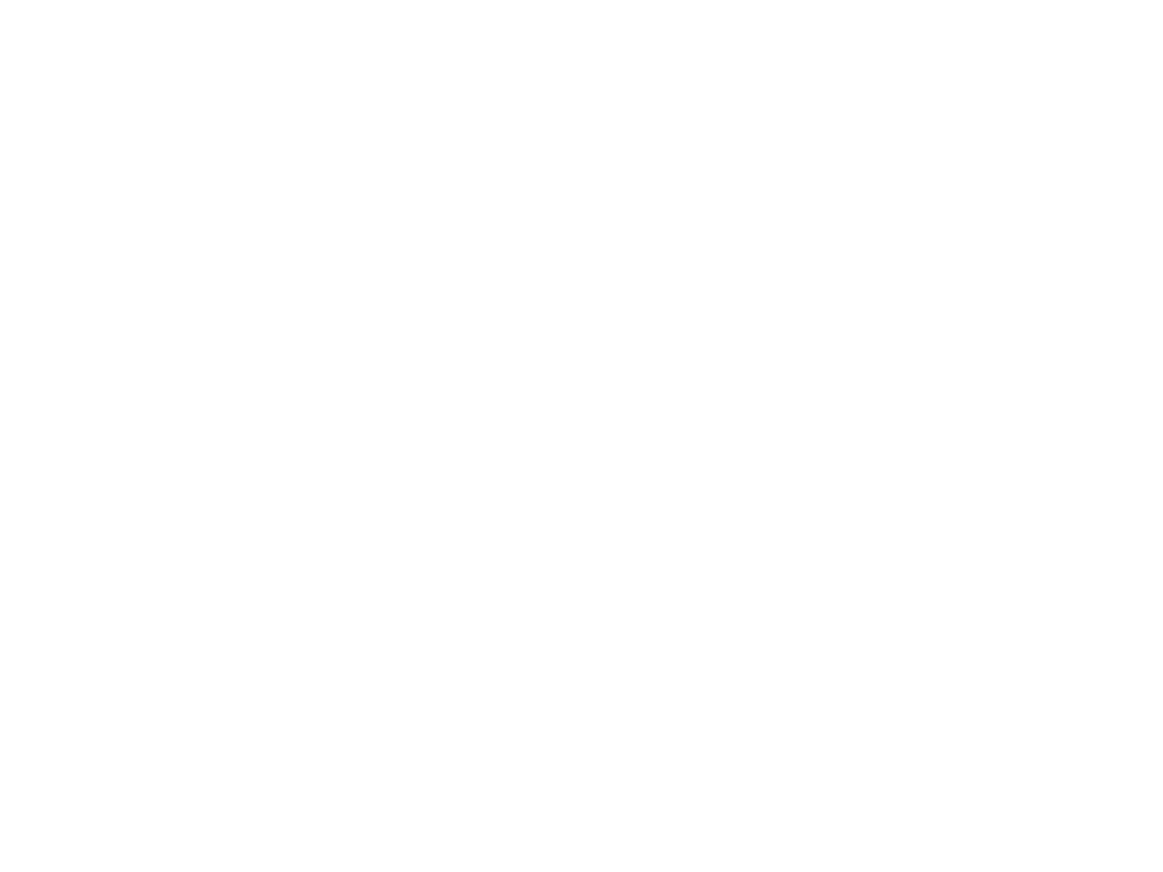

In [3]:
%matplotlib notebook
data = np.random.randn(50)
plt.plot(data)
plt.show()

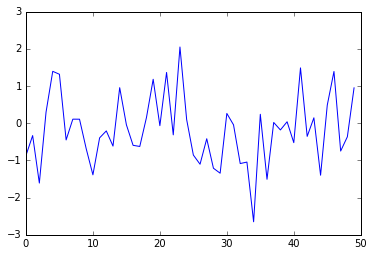

In [4]:
%matplotlib inline
plt.plot(data)

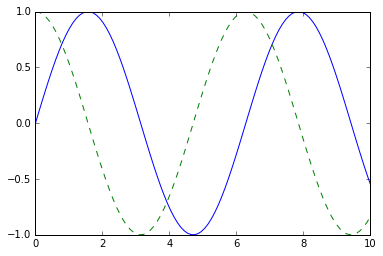

In [5]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

### 将图形保存为文件

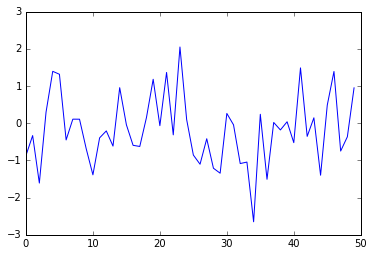

In [6]:
plt.plot(data)
plt.savefig('images/06.00_test1.png')


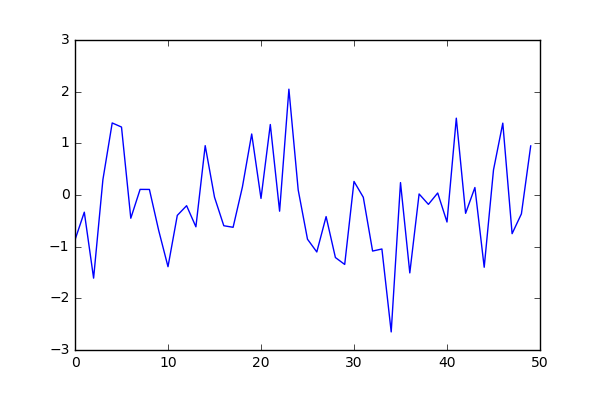

In [7]:
from IPython.display import Image
Image('images/06.00_test1.png')

在`savafig()`里面，保存图片文件的格式就是文件的扩展名。  
Matplotlib 支持许多图形格式， 具体格式由操作系统已安装的图形显示
接口决定。 你可以通过 canvas 对象的方法查看系统支持的文件格式：

In [8]:
fig = plt.figure()
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 432x288 with 0 Axes>

### 设置图形大小

`fig = plt.figure(figsize=(a,b), dpi=dpi)`
+ figsize：设置图形大小，a为图形的宽，b为图形的高，单位英寸
+ dpi: 设置图形每英寸的像素

此时图形的像素为：  
x，y = a\*dpi, b\*dpi    
分辨率为：  


也就是说同一像素尺寸的图形(如，1200\*600)可以有**任意种不同的组合**
figsize = (15,7.5), dpi=80  
figsize = (12,6), dpi=100  
figsize = (8,4), dpi=200  
...

线条，标记，文本等大多数元素都有以磅为单位的大小。Matplotlib 中 每英寸点数（ppi）为72，则宽度为 1 点的线将为 1/72 英寸宽，使用 fontsize 12 点的文本将是 12/72 寸高。

另一方面，更改dpi会缩放元素。在72 dpi时，1 宽度的线是 1 像素。在144 dpi时，这条线就是 2 像素。因此，更大的dpi就像放大镜一样。**所有元素都通过镜头的放大倍数进行缩放**。dpi越高，图片清晰度越好

`plt.savefig(dpi=100)`

In [9]:
data = np.random.randint(1,10,5)

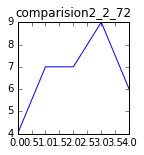

In [10]:
fig1 = plt.figure(figsize=(2,2), dpi=72)
plt.plot(data)
plt.title('comparision2_2_72')
plt.savefig('images/comparision2_2_72',dpi=72)
plt.show()

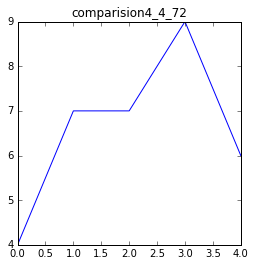

In [11]:
fig2 = plt.figure(figsize=(4,4), dpi=72)
plt.plot(data)
plt.title('comparision4_4_72')
plt.savefig('images/comparision4_4_72',dpi=72)
plt.show()

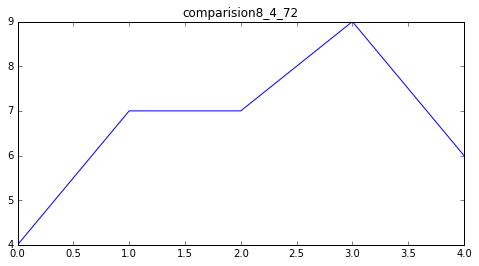

In [12]:
fig = plt.figure(figsize=(8,4), dpi=72)
plt.plot(data)
plt.title('comparision8_4_72')
plt.savefig('images/comparision8_4_72',dpi=72)
plt.show()

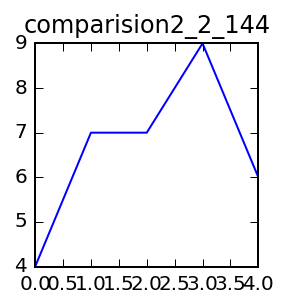

In [13]:
fig = plt.figure(figsize=(2,2), dpi=144)
plt.plot(data)
plt.title('comparision2_2_144')
plt.savefig('images/comparision2_2_144',dpi=144)
plt.show()

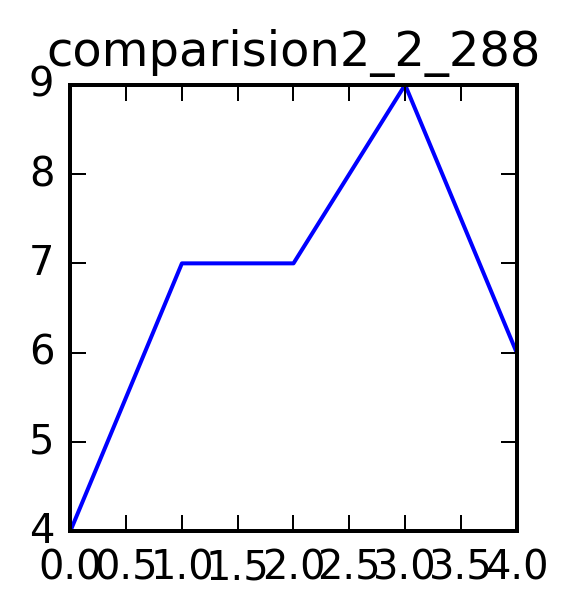

In [14]:
fig = plt.figure(figsize=(2,2), dpi=288)
plt.plot(data)
plt.title('comparision2_2_288')
plt.savefig('images/comparision2_2_288', dpi=288)
plt.show()

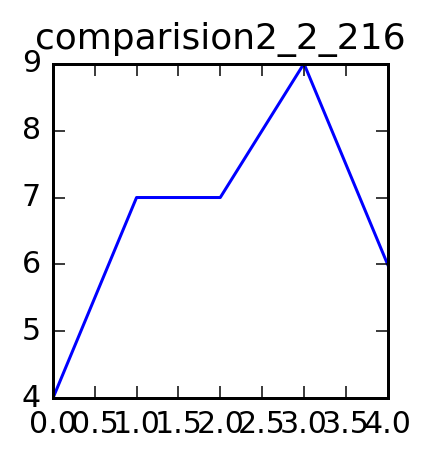

In [15]:
fig = plt.figure(figsize=(2,2), dpi=216)
plt.plot(data)
plt.title('comparision2_2_216')
plt.savefig('images/comparision2_2_216', dpi=216)
plt.show()

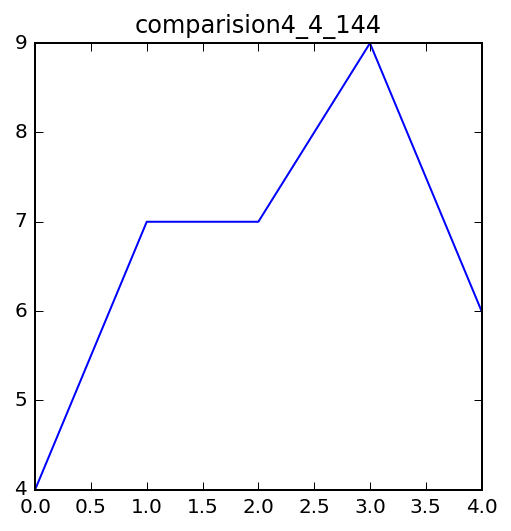

In [16]:
fig = plt.figure(figsize=(4,4), dpi=144)
plt.plot(data)
plt.title('comparision4_4_144')
plt.savefig('images/comparision4_4_144', dpi=144)
plt.show()

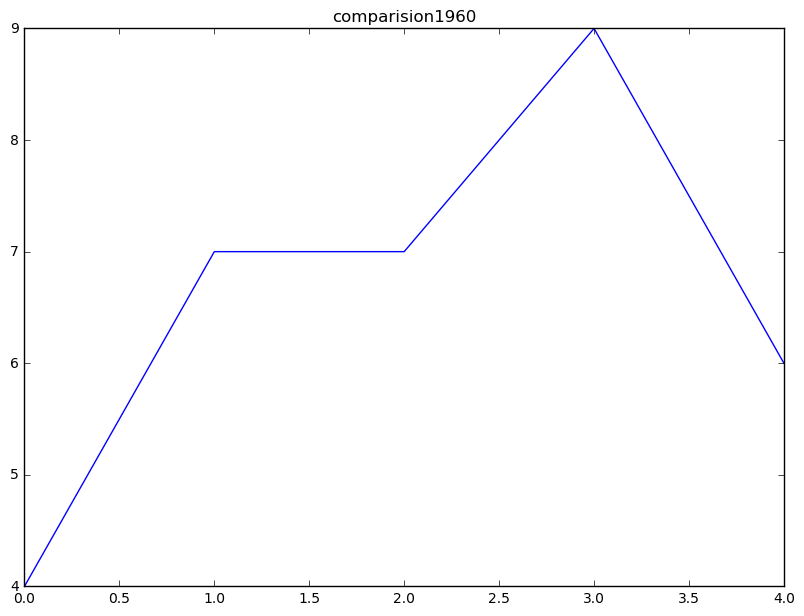

In [17]:
fig = plt.figure(figsize=(19.6/2,14.4/2), dpi=100)
plt.plot(data)
plt.title('comparision1960')
plt.savefig('images/comparision1960', dpi=200)
plt.show()

### 设置中文字体

```python
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
plt.rcParams['figure.dpi'] = 300  # 用来设置图片像素
```

In [50]:
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
plt.rcParams['figure.dpi'] = 100

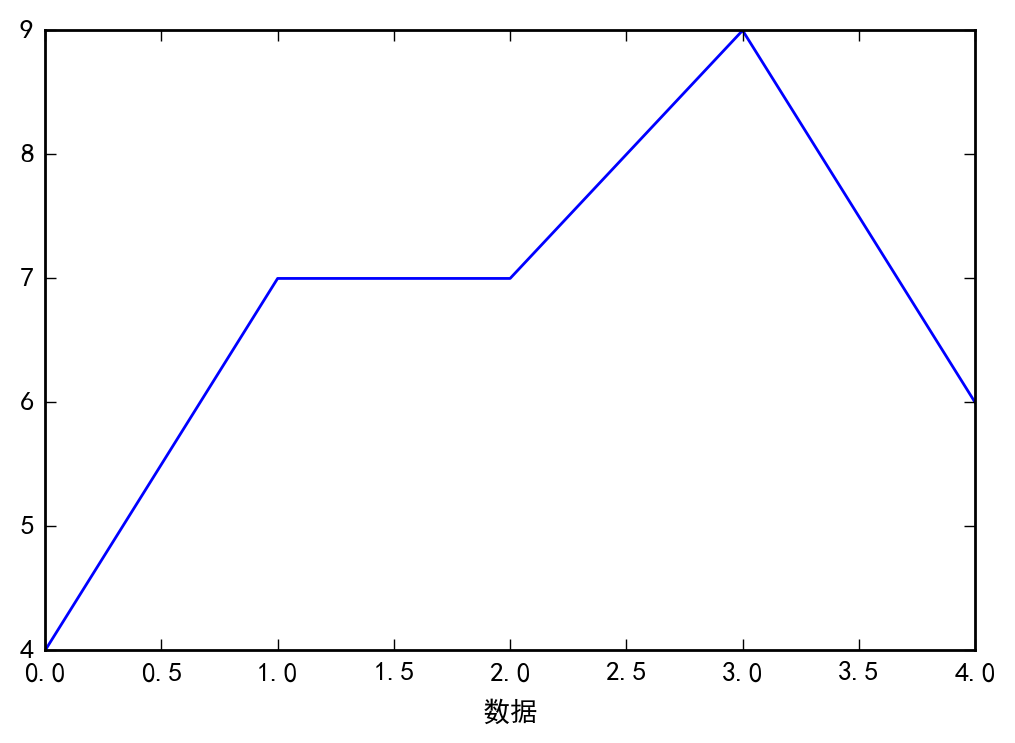

In [19]:
plt.xlabel('数据')
plt.plot(data)
plt.show()

## 两种画图接口

### Matlab风格接口
这种接口最重要的特性是有状态的（stateful） ： 它会持续跟踪“当前
的”图形和坐标轴， 所有 plt 命令都可以应用。 你可以用 `plt.gcf()`
（获取当前图形） 和 `plt.gca()`（获取当前坐标轴） 来查看具体信息

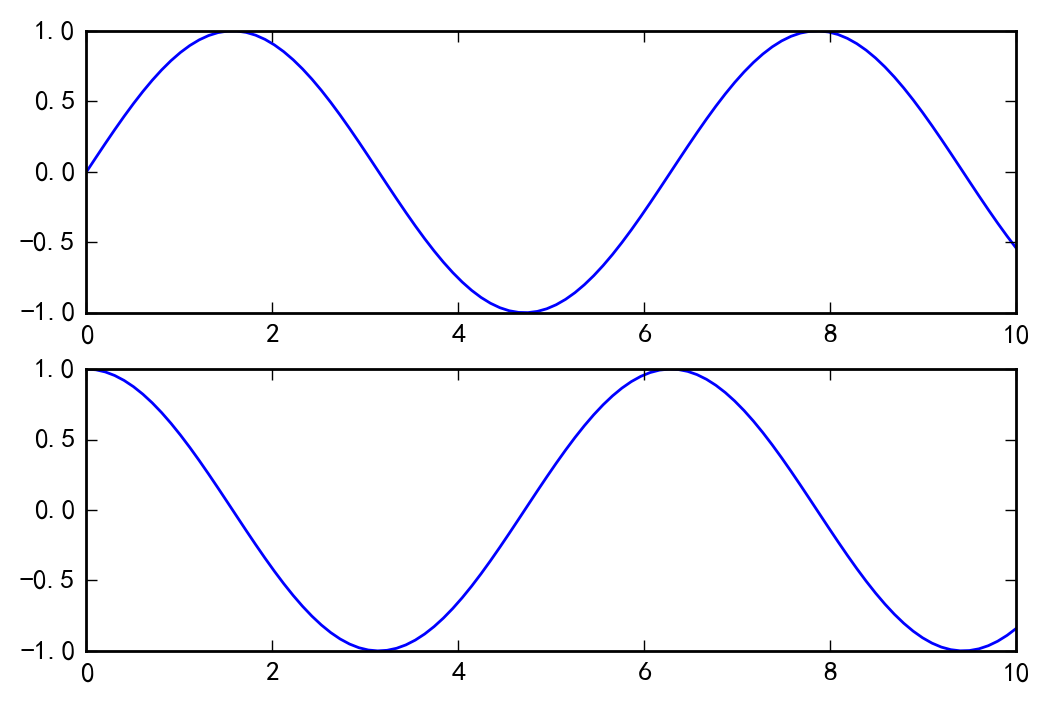

In [20]:
plt.figure() # 创建图形
# 创建两个子图中的第一个， 设置坐标轴
plt.subplot(2, 1, 1) # (行、 列、 子图编号)
plt.plot(x, np.sin(x))
# 创建两个子图中的第二个， 设置坐标轴
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

### 面向对象接口

能更好地控制图形，画图函数不会受当前‘活动’图形或坐标轴的影响。
而且是变成了显示的`Figure和Axes`方法

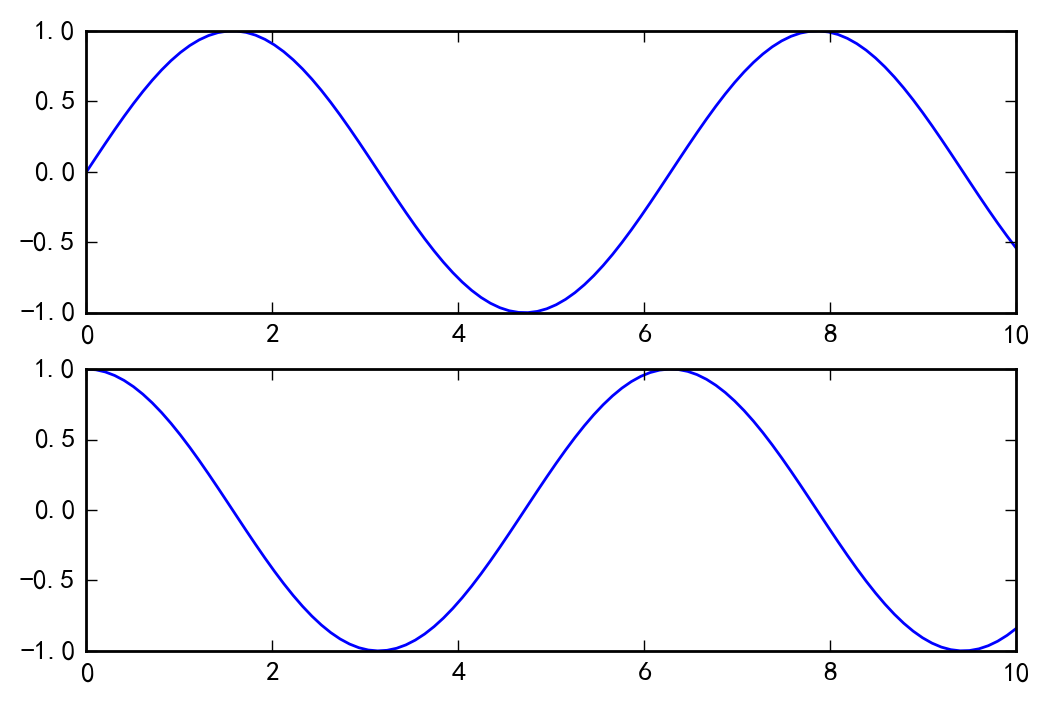

In [21]:
# 先创建图形网络
# ax是一个包含两个Axes对象的数组
fig, ax = plt.subplots(2)

# 在每个对象上调用plot()方法
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

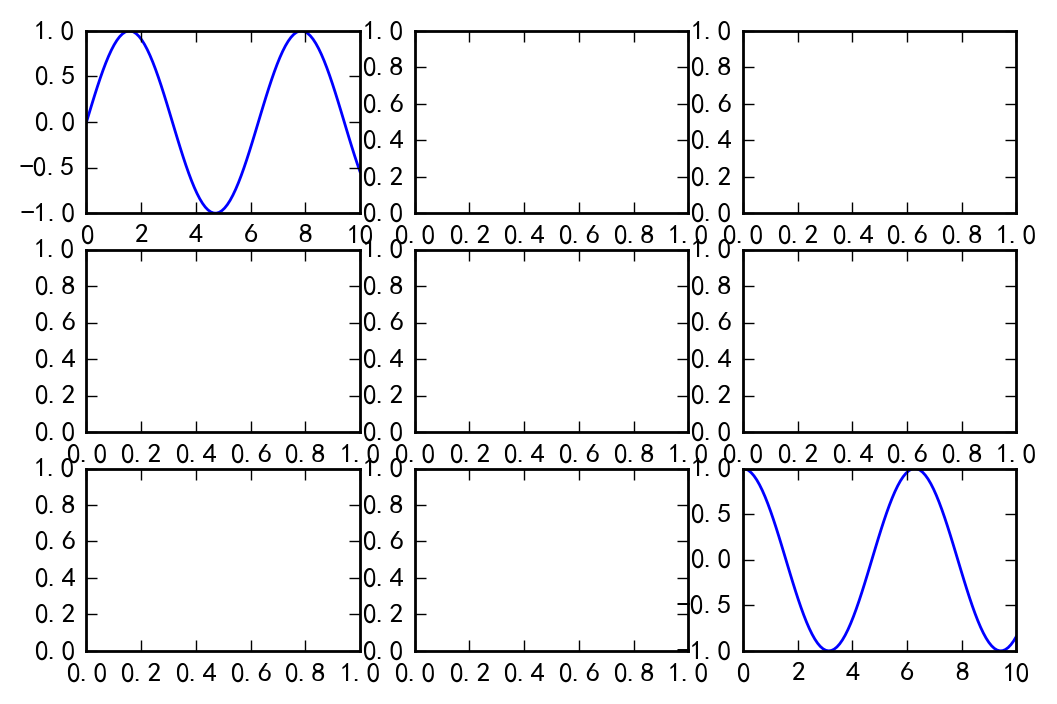

In [22]:
fig, ax = plt.subplots(3,3)
ax[0,0].plot(x,np.sin(x))
ax[-1,-1].plot(x, np.cos(x))

## 简易线形图

1. 创建Figure对象`plt.figure()`
2. 创建Axes对象`plt.axes()`
3. 开始画图

In [23]:
plt.style.use('seaborn-whitegrid')

要画matplotlib图形时，必须先创建一个图形fig，和一个坐标轴ax  
在 Matplotlib 里面， figure（plt.Figure 类的一个实例） 可以被看成是
一个能够容纳各种坐标轴、 图形、 文字和标签的容器。 就像你在图中看
到的那样， axes（plt.Axes 类的一个实例） 是一个带有刻度和标签的
矩形， 最终会包含所有可视化的图形元素。

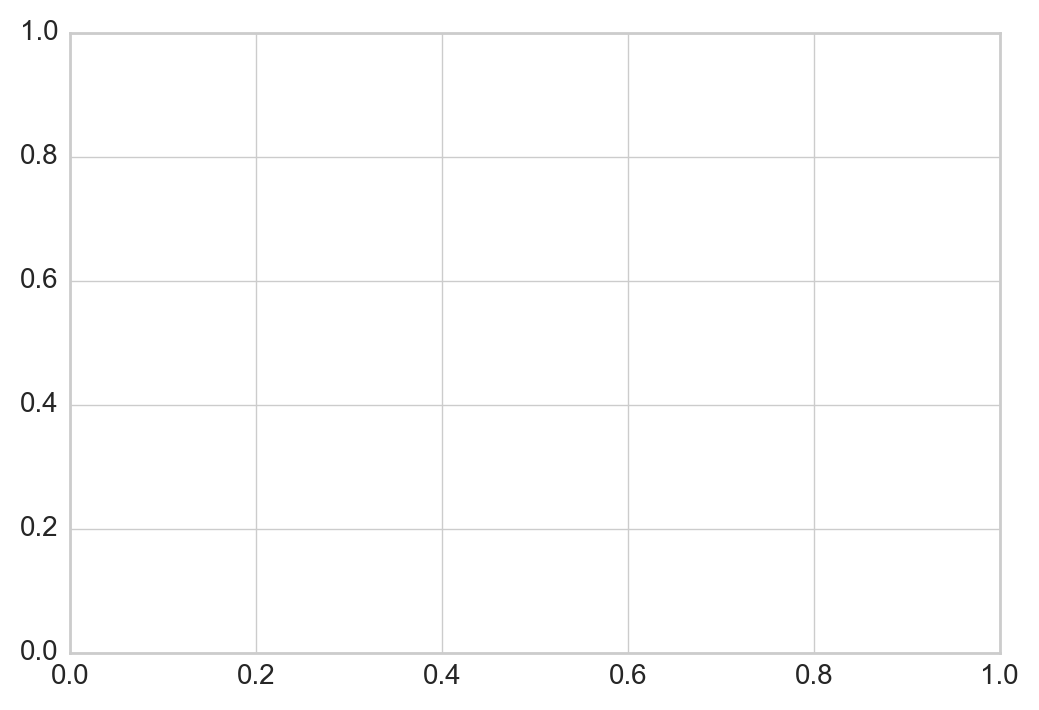

In [24]:
fig = plt.figure()
ax = plt.axes()

创建好了就可以开始画图

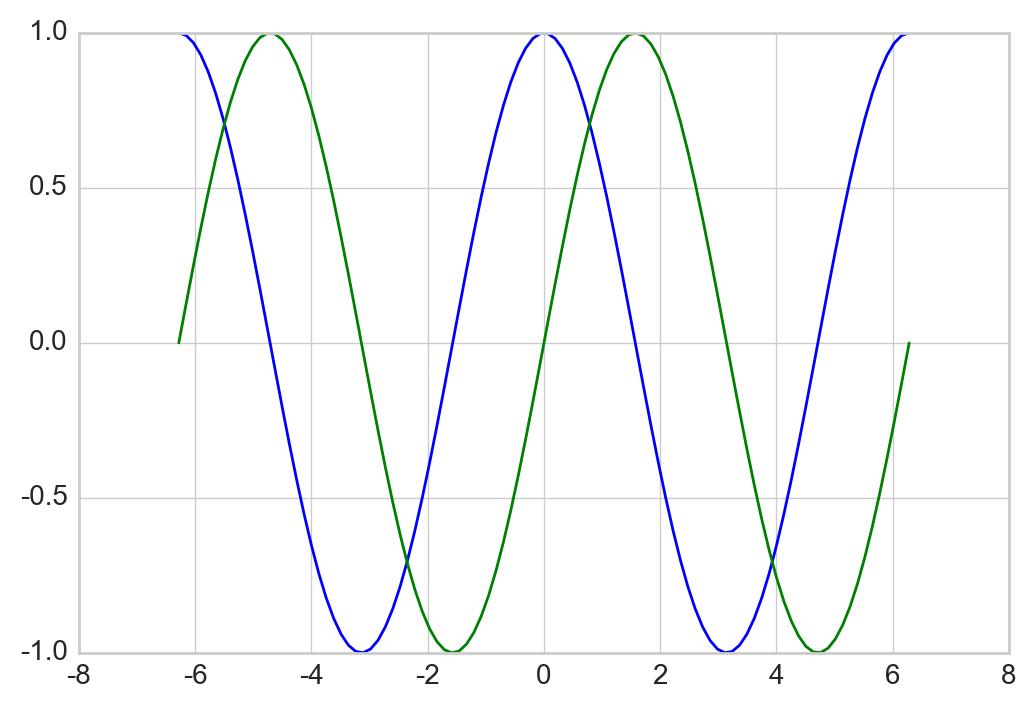

In [25]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(-2*np.pi,2*np.pi,100)
ax.plot(x, np.cos(x))
ax.plot(x, np.sin(x))

### 调整图形：线条颜色和风格

1. 通过修改`.plot(color)`参数可以修改线条颜色  
如果不指定颜色，matplotlib会自动为多条线自动循环使用一组默认颜色

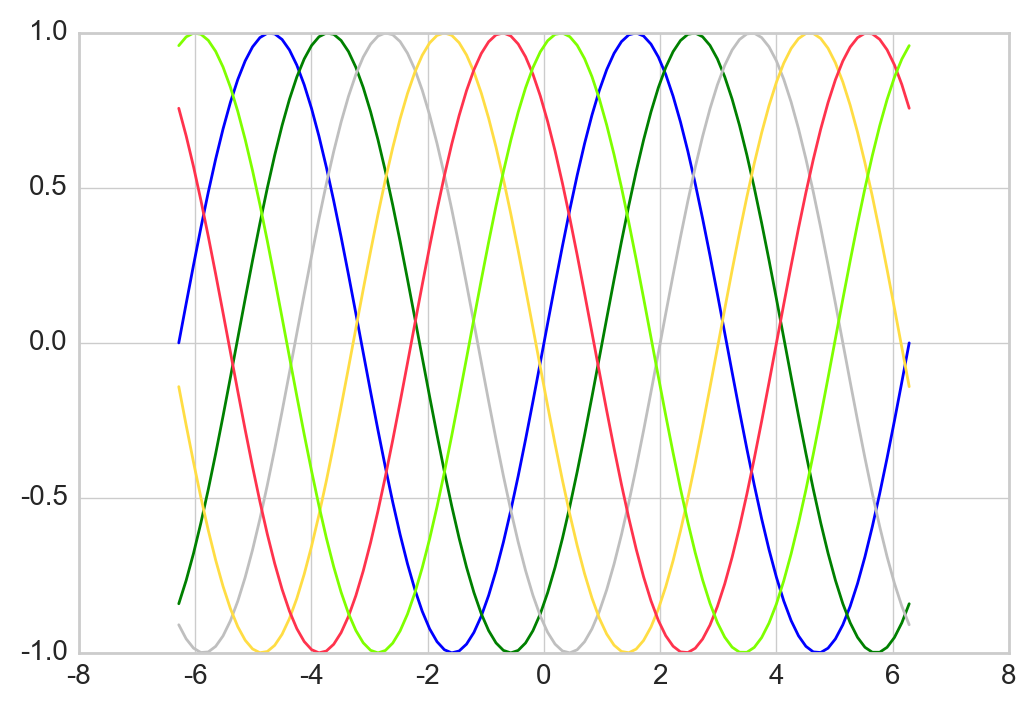

In [29]:
plt.plot(x, np.sin(x - 0), color='blue') # 标准颜色名称
plt.plot(x, np.sin(x - 1), color='g') # 缩写颜色代码（rgbcmyk）
plt.plot(x, np.sin(x - 2), color='0.75') # 范围在0~1的灰度值
plt.plot(x, np.sin(x - 3), color='#FFDD44') # 十六进制（RRGGBB， 00~FF）
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB元组， 范围在0~1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # HTML颜色名称

2. 通过修改`plot(linestyle=)`可以修改线条的风格

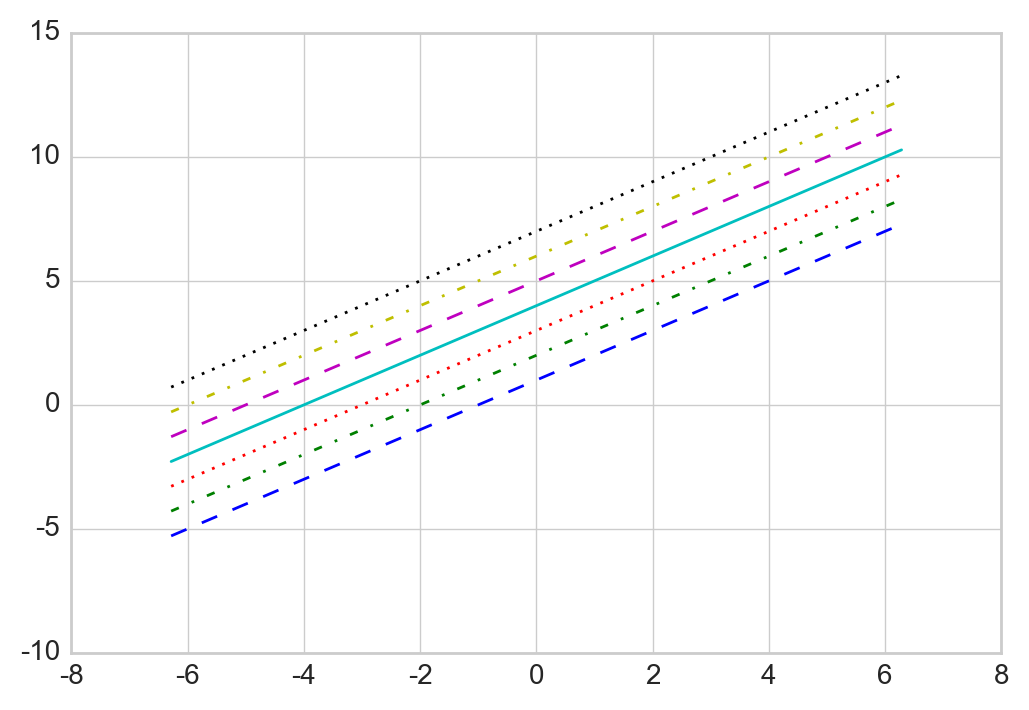

In [34]:
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');
# 你可以用下面的简写形式
plt.plot(x, x + 4, linestyle='-') # 实线
plt.plot(x, x + 5, linestyle='--') # 虚线
plt.plot(x, x + 6, linestyle='-.') # 点划线
plt.plot(x, x + 7, linestyle=':'); # 实点线

3. 两种方式结合

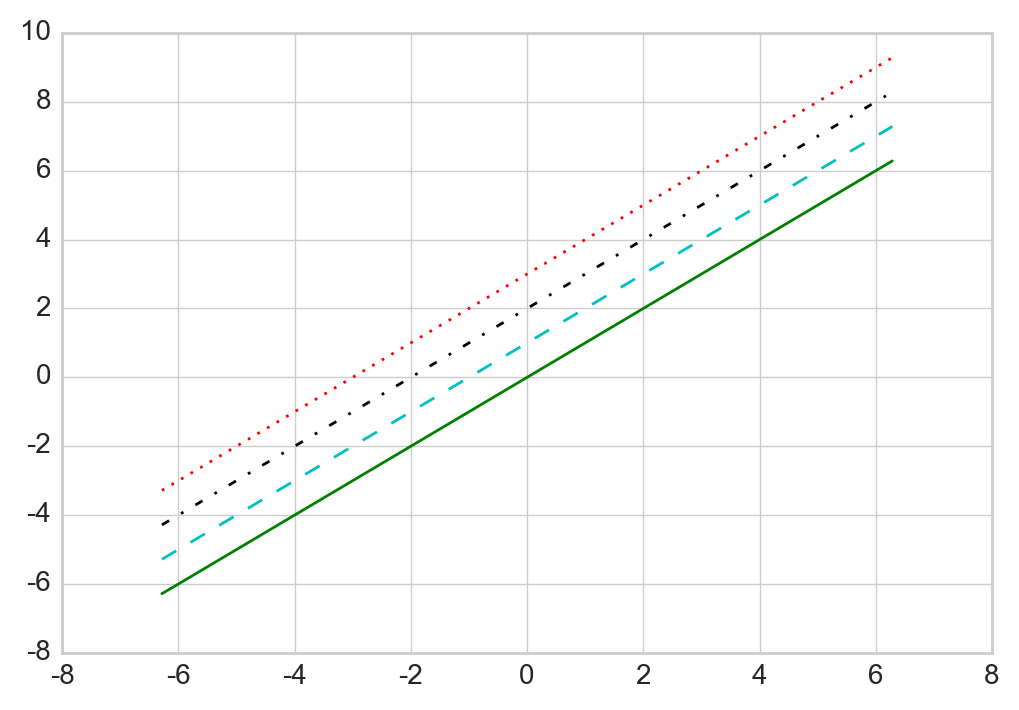

In [38]:
plt.plot(x, x, '-g')  # 绿色实线
plt.plot(x, x+1, '--c')  # 青色虚线
plt.plot(x, x+2, '-.k')  # 黑色点虚线
plt.plot(x, x+3, ':r')  # 红色点实线

### 调整图形：坐标上下限

`plt.plot(x,y)`
+ plt.xlim(L, U)
+ plt.ylim(L, U)

(-1.2, 1.2)

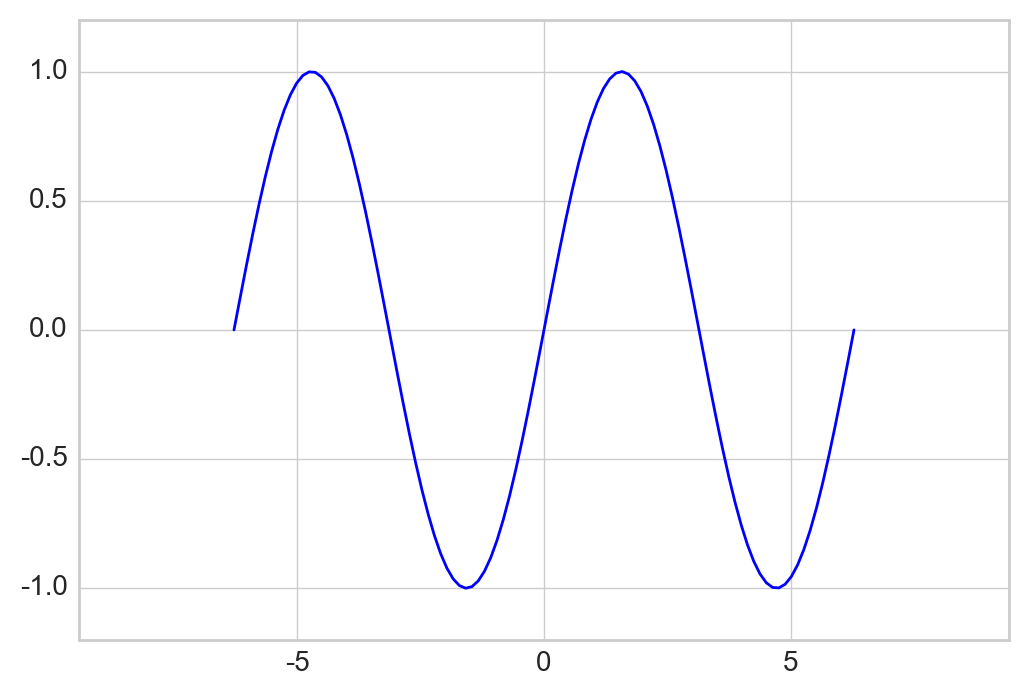

In [45]:
plt.plot(x, np.sin(x))
plt.xlim(-3*np.pi, 3*np.pi)
plt.ylim(-1.2, 1.2)

实现坐标轴逆序，只需要把坐标刻度右极限大于左极限就可以了
`plt.xlim(x_1, -x_2)`

(8, -8)

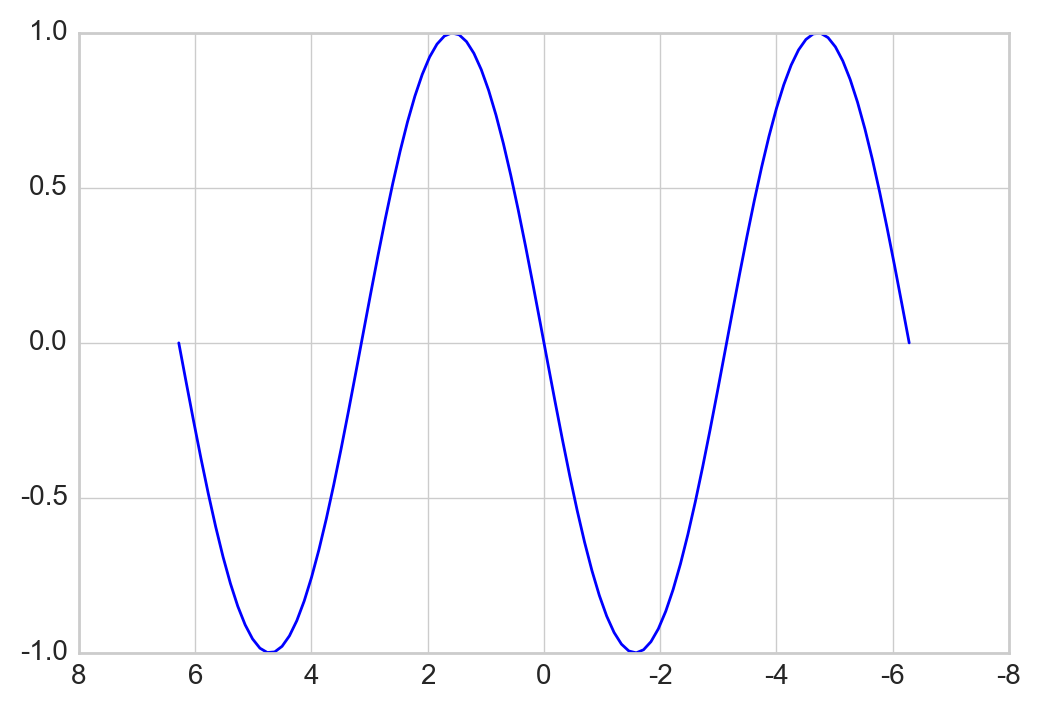

In [47]:
plt.plot(x, np.sin(x))
plt.xlim(8, -8)

通过`plt.axis([xmin, xmax, ymin, ymax])`实现坐标轴的上下限

[-8, 8, -1.5, 1.5]

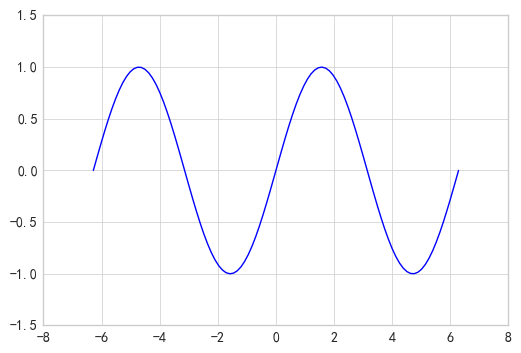

In [51]:
plt.plot(x, np.sin(x))
plt.axis([-8, 8, -1.5, 1.5])

通过修改`plt.axis('tight')`'收紧'坐标轴

(-6.283185307179586,
 6.283185307179586,
 -0.9998741276738751,
 0.9998741276738751)

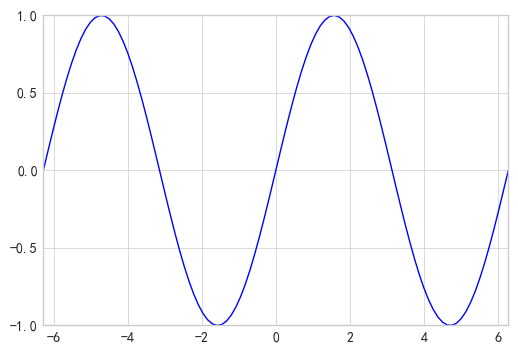

In [54]:
plt.plot(x, np.sin(x))
# plt.axis([-8, 8, -1.5, 1.5])
plt.axis('tight')

通过修改`plt.axis('equal')`'相等布局'坐标轴

(-8.0, 8.0, -1.0, 1.0)

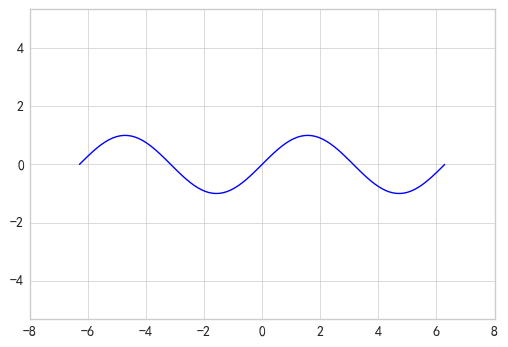

In [55]:
plt.plot(x, np.sin(x))
plt.axis('equal')

### 设置图形标签
1. 为图形设置标签
    + plt.title()
    + plt.xlabel()
    + plt.ylabel()
2. 为线条设置标签
    + plt.plot(x_1,y_1, label='1')
    + plt.plot(x_2,y_2, label='2')    

Text(0, 0.5, 'sin(x)')

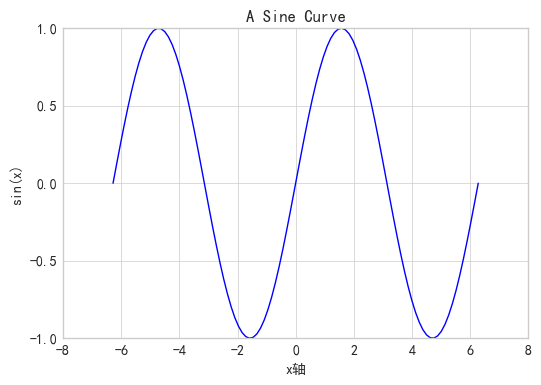

In [57]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")  # 图片标题
plt.xlabel("x轴")  # x标签
plt.ylabel("sin(x)")  # y标签

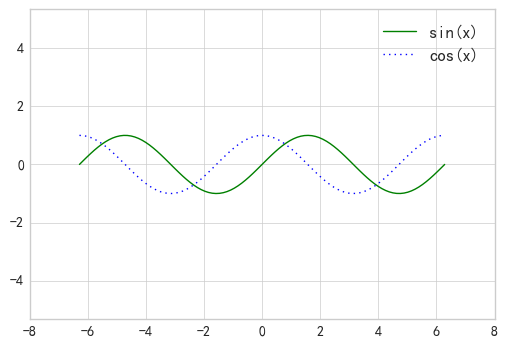

In [61]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')
plt.legend();

**Matplotlib陷阱**

虽然绝大多数的 plt 函数都可以直接转换成 ax 方法（例如
plt.plot() → ax.plot()、 plt.legend() → ax.legend()
等） ， 但是并非所有的命令都可以这样用。 尤其是用来设置坐标轴
上下限、 坐标轴标题和图形标题的函数， 它们大都稍有差别。 一些
MATLAB 风格的方法和面向对象方法的转换如下所示：

+ plt.xlabel() → ax.set_xlabel()
+ plt.ylabel() → ax.set_ylabel()
+ plt.xlim() → ax.set_xlim()
+ plt.ylim() → ax.set_ylim()
+ plt.title() → ax.set_title()  
也可以一次性设置
+ plt.set(xlim=()......)

[(-1.5, 1.5),
 Text(0, 0.5, 'sin(x)'),
 (-4, 4),
 Text(0.5, 0, 'x'),
 Text(0.5, 1.0, 'sin(x)')]

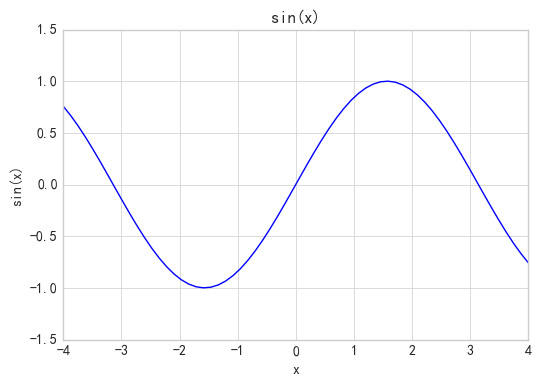

In [66]:
ax = plt.axes()
ax.plot(x, np.sin(x))
# ax.xlim(-4, 4)
ax.set(xlim=(-4,4), ylim=(-1.5, 1.5), title='sin(x)', xlabel='x', ylabel='sin(x)')

## 简易散点图(scatter plot)

###  用`plt.plot`画散点图

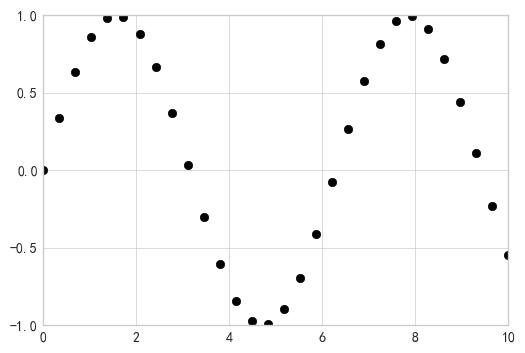

In [67]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color='black');

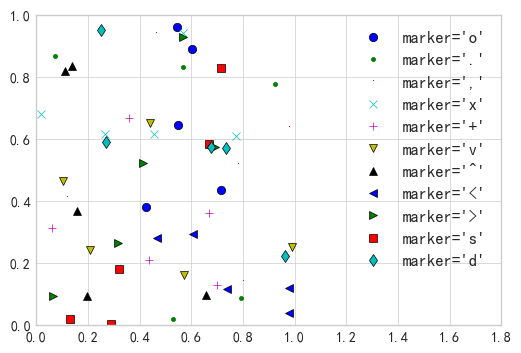

In [68]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
    label="marker='{0}'".format(marker))
    plt.legend(numpoints=1)
    plt.xlim(0, 1.8)

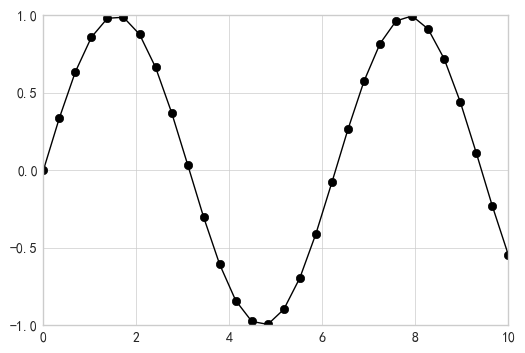

In [69]:
 plt.plot(x, y, '-ok'); # 直线（-） 、 圆圈（o） 、 黑色（k）

设置线条和散点的属性

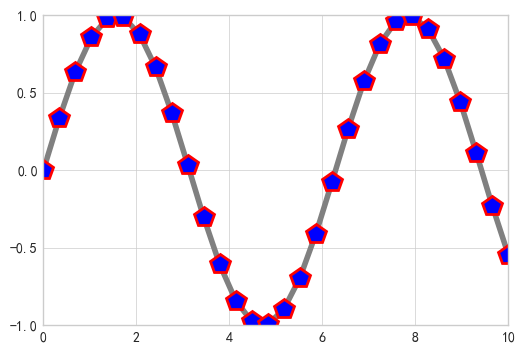

In [78]:
plt.plot(x, y, '-p', color='gray',
        markersize=15, linewidth=4,
        markerfacecolor='blue',
        markeredgecolor='red',
        markeredgewidth=2)

### 使用`plt.scatter`画散点图



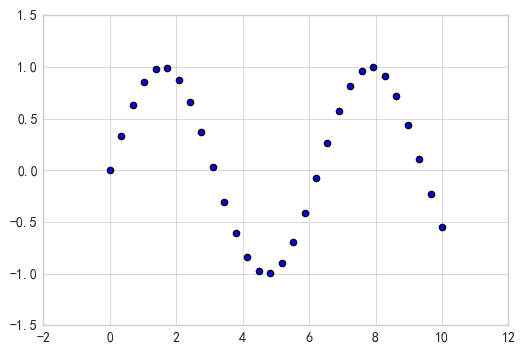

In [79]:
plt.scatter(x, y, marker='o');

plt.scatter 与 plt.plot 的主要差别在于， 前者在创建散点图时具有
更高的灵活性， 可以单独控制每个散点与数据匹配， 也可以让每个散点
具有不同的属性（大小、 表面颜色、 边框颜色等）

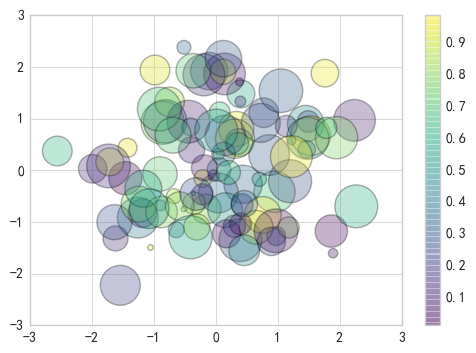

In [86]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar()  # 显示颜色条

Text(0, 0.5, 'sepal width (cm)')

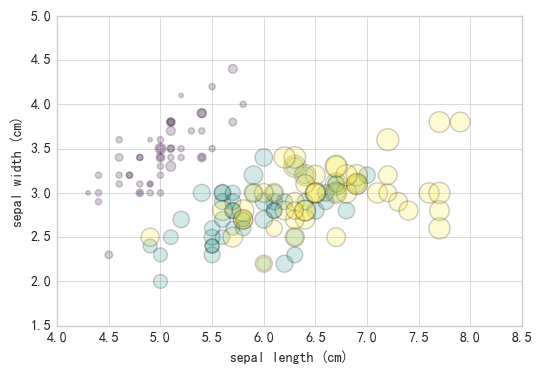

In [87]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
plt.scatter(features[0], features[1], alpha=0.2,
s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

### plot与scatter: 效率对比
plt.plot 与 plt.scatter 除了特征上的差异之外， 还有什么影响我们
选择的因素呢？ 在数据量较小的时候， 两者在效率上的差异不大。 但是
当数据变大到几千个散点时， plt.plot 的效率将大大高于
plt.scatter。 这是由于 plt.scatter 会对每个散点进行单独的大小
与颜色的渲染， 因此渲染器会消耗更多的资源。 而在 plt.plot 中， 散
点基本都彼此复制， 因此整个数据集中所有点的颜色、 尺寸只需要配置
一次。 由于这两种方法在处理大型数据集时有很大的性能差异， 因此面
对大型数据集时， plt.plot 方法比 plt.scatter 方法好。

## 可视化异常处理

### 基本误差线(errorbar)
`fmt`是一种控制线条和点外观的代码格式，语法与`plt.plot`的缩写代码一样

<ErrorbarContainer object of 3 artists>

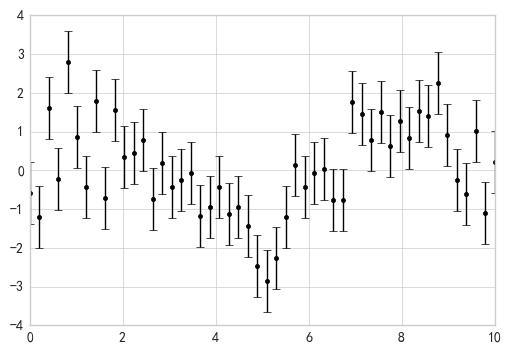

In [91]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='.k')

<ErrorbarContainer object of 3 artists>

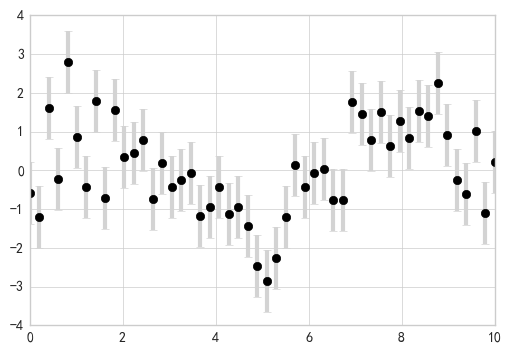

In [95]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3)

### 连续误差
请注意， 我们将 fill_between 函数设置为： 首先传入 x 轴坐标值， 然
后传入 y 轴下边界以及 y 轴上边界， 这样整个区域就被误差线填充了。

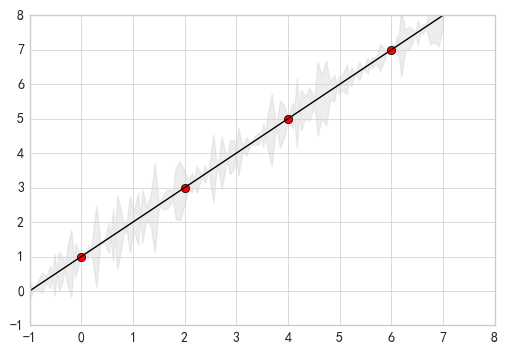

In [120]:
xdata = np.array([0, 2, 4, 6])
ydata = x + 1
plt.axis([-1,8, -1, 8])

xfit = np.linspace(-1,7,100)
yfit = xfit+1

dy = 0.5
dyfit = np.random.randn(100) * dy

plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-k', )
plt.fill_between(xfit, yfit-dyfit, yfit+ dyfit,
                 color='lightgray', alpha=0.4)


## 密度图与等高线
有时在二维图上用等高线图或者彩色图来表示三维数据是个不错的方
法。 `Matplotlib` 提供了三个函数来解决这个问题： 用 `plt.contour` 画等
高线图、 用 `plt.contourf` 画带有填充色的等高线图（filled contour
plot） 的色彩、 用 `plt.imshow` 显示图形。 这节将用这三个函数介绍一
些示例。

In [121]:
plt.style.use('seaborn-white')

### 三维函数可视化
等高线图可以用 plt.contour 函数来创建。 它需要三个参数： x 轴、 y
轴、 z 轴三个坐标轴的网格数据。 x 轴与 y 轴表示图形中的位置， 而 z 轴
将通过等高线的等级来表示。 

In [122]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

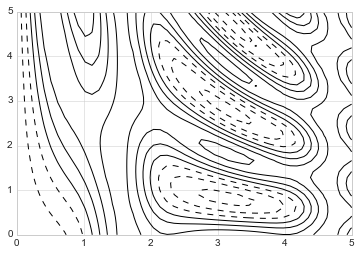

In [168]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z, colors='black')

`np.meshgrid（）`补充

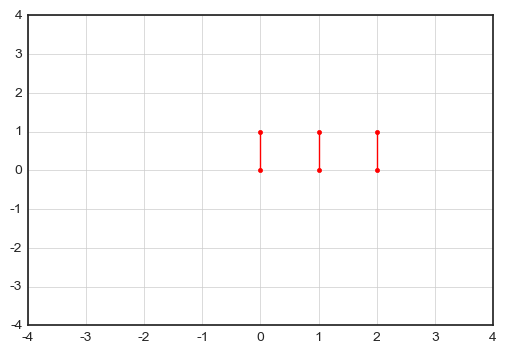

In [140]:

x = np.array([[0, 1, 2], [0, 1, 2]])
y = np.array([[0, 0, 0], [1, 1, 1]])


plt.plot(x, y,
         color='red',  # 全部点设置为红色
         marker='.',  # 点的形状为圆点
         linestyle='-')  # 线型为空，也即点与点之间不用线连接
plt.axis([-4,4,-4,4])
plt.grid(True)
plt.show()

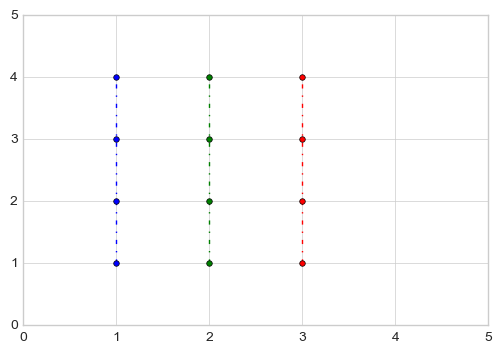

In [156]:
x = np.array([1,2,3])
y = np.array([1,2,3,4])
X, Y = np.meshgrid(x, y)
plt.axis([0,5,0,5])
plt.style.use('seaborn-whitegrid')
plt.plot(X, Y, '-.', marker='o', markersize=4)
# plt.grid(True)

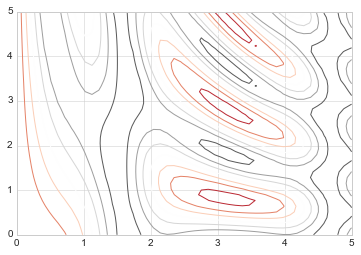

In [172]:
plt.contour(X,Y,Z,cmap='RdGy')
# plt.cm.*?

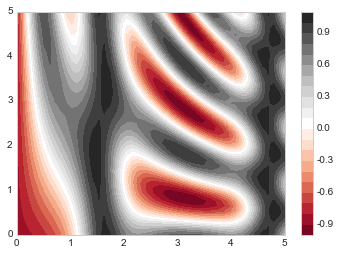

In [173]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

(0.0, 5.0, 0.0, 5.0)

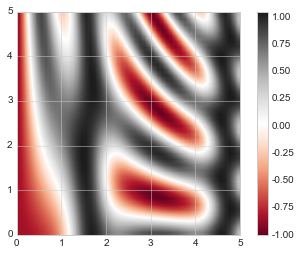

In [176]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image')

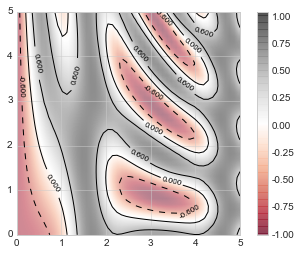

In [178]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
cmap='RdGy', alpha=0.5)
plt.colorbar();

## 频率直方图、数据区间划分和密度划分

### 频率直方图

In [183]:
%matplotlib inline
plt.style.use('seaborn-white')

1. 简易直方图

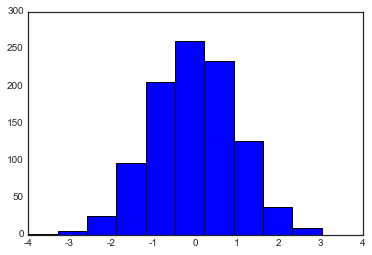

In [186]:
data = np.random.randn(1000)
plt.hist(data)
plt.show()

2. 自定义直方图

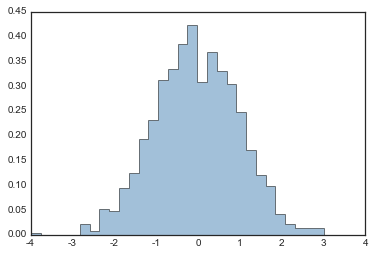

In [206]:
# density: y轴使用密度表示
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',edgecolor=None)  
plt.show()

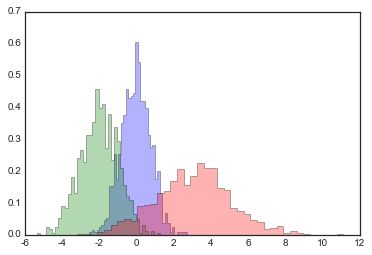

In [207]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

计算频次


In [211]:
counts, bin_edges = np.histogram(data, bins=10)
counts

array([  1,   5,  25,  96, 205, 261, 234, 126,  38,   9], dtype=int64)